
## **Data Analytics in Health Care and Connected Care**
---
---
 *Practical Session I: Introduction to Data Analytics in Healthcare - understanding and working with healthcare data*


---
---
The aims of this practical session are: (a) to make you understand the importance of the information found in electronic health records (EHR); (b) gain insights in performing data analysis using [Python](https://www.python.org/) programming language; (c) complete the CITI “Data or Specimens Only Research” course related with ethics in healthcare. During all the practical sessions, you should use ['Google Colab'](https://colab.research.google.com/notebooks/intro.ipynb#recent=true) cloud service to run your code (basic instructions how to get started are found [here](https://colab.research.google.com/notebooks/welcome.ipynb)). All practical sessions are graded. You must work in groups of two students and submit (only one submission) the completed notebook of the first practical session in Canvas by March 13th, 23:59:59 (GMT+1).

---
---

*Lecturer/s: Bart Jansen (bjansen@etrovub.be),  Jef Vandemeulebroucke (jefvdmb@etrovub.be), Nikolaos Deligiannis (ndeligia@etrovub.be)*

*Teaching assistant/s: Joris Wuts(jwuts@etrovub.be), Jasabanta Patro (jpatro@etrovub.be), Redona Brahimetaj (rbrahime@etrovub.be)*


In [2]:
student1_full_name = str(input('Enter your full name: '))
student1_id = int(input('Enter your student ID: '))
student2_full_name = str(input('Enter your full name: '))
student2_id = int(input('Enter your student ID: '))

ValueError: invalid literal for int() with base 10: 'ada'

---
---
#Electronic Health Records (EHR)
---

---


> As already seen during the lecture/s, EHRs contain an enormous amount of information (usually available in an unstructured format/free text). While humans can read the document and easily get the information they need, using their data for analysis or machine learning without structuring or preprocessing them firstly, is challenging. Considering examples found [here](https://www.mtsamples.com/index.asp) and what you saw/learned during lectures, please list what information is usually written/found there and some possible research use-cases using the information we get from them.



---
---


> Info inside an EHR

*   List item
*   List item
*   ...

> Possible research use-cases using EHR information:

*   List item
*   List item
*   ....



---
---
#Healthcare data analysis using Python
---
---
To complete this part of the lab, you should use the excel files shared in Canvas ('noteevents.xlsx' and 'patients.xlsx'). The 'noteevents.xlsx' file, consists of four columns: subject_id (the patient identifier), chartdate (date when the note was created), category (what is the type of the note, e.g. urology, dentistry, orthopedic) and text (the EHR text portion of the note). The other excel file 'patients.xlsx', contains very basic structured information for patients (columns: subject_id (the patient identifier), gender (male or female), dob (date of birth)). You will be performing some basic analysis (using Python) which will help you to better understand the data available. To work with the excel files, you should use [pandas library](https://pandas.pydata.org/docs/getting_started/overview.html). For plotting, you are allowed to use [matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/)/[bokeh](https://bokeh.org//). 

---

In [4]:
#import libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime, date 
import xlrd

##Basic analysis on patients using Python

Perform some basic statistics on the 'patient.xlsx' file. 

*   Check if there are empty/NaN values on the dataframe.
*   Find out if there is a gender balance among our patients.
*   Plot the gender occurrencies.
*   Add a new column 'age' in the dataframe. The age of each patient can be computed from 'dob' column. 

In [5]:
#read 'patient.xlsx' file into a DataFrame.
df1 = pd.read_excel('patients.xlsx', sheet_name='Sheet1')
print(df1.head(10))

   subject_id gender        dob
0           0      M 2000-01-01
1           1      F 1969-01-10
2           2      F 1995-08-06
3           3      M 1967-06-01
4           4      M 1963-06-02
5           5      M 1969-01-10
6           6      F 1995-06-09
7           7      F 1969-01-10
8           8      F 1995-06-09
9           9      F 1967-06-01


In [6]:
#check if there are empty/NaN values
check_empty = df1.empty
check_empty

False

In [7]:
#count and print the occurencies of male and female patients
df1['gender'].value_counts()

F    160
M    140
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

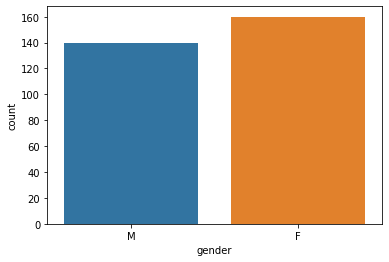

In [8]:
#plot their occurencies using one of the specified plotting libraries
sns.countplot(x='gender',data=df1)

In [9]:
#compute age from 'dob' column: 
# --> (a) use to_datetime() method to convert 'dob' to datetime format
datetime_format = pd.to_datetime(df1["dob"])

In [10]:
# --> (b) create a function that returns the age from 'dob'
def age(val):
    a = (pd.to_datetime('now') - df1['dob']).astype('<m8[Y]')
    return a

In [11]:
# --> (c) apply the function to the column 'dob'
df1['age'] = age(df1['dob'])
df1.head()

,subject_id,gender,dob,age
0,0,M,2000-01-01,21.0
1,1,F,1969-01-10,52.0
2,2,F,1995-08-06,25.0
3,3,M,1967-06-01,53.0
4,4,M,1963-06-02,57.0


## Basic data analysis on EHR information using Python

In this part, you will analyse the EHR information found in 'noteevents.xlsx' file. 

*   Find out how many distinct categories are found in 'notevents.xlsx' file.
*   Merge noteevents and patient dataframe based on patient_id.
*   Using pandas groupby() method print the mean age per gender.
*   Filter the dataframe to return information only for male patients whose age is more than 50 years old. 
*   Plot which category has the highest amount of requests and this corresponding amount per gender.



In [12]:
#read 'noteevents.xlsx' file into a DataFrame.
df2 = pd.read_excel('noteevents.xlsx', sheet_name='Sheet1')
df2.head(10)

,subject_id,chartdate,category,text
0,0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
5,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
6,1,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,1,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,1,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
9,2,01/01/2037,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."


In [13]:
#print the unique values of 'category' column
print(df2['category'].unique())

[' Urology' ' Emergency Room Reports' ' General Medicine'
 ' Consult - History and Phy.' ' Rheumatology' ' Dermatology' ' Radiology'
 ' Obstetrics / Gynecology' ' Discharge Summary'
 ' Cardiovascular / Pulmonary' ' Letters' ' Gastroenterology'
 ' Orthopedic' ' SOAP / Chart / Progress Notes' ' Office Notes'
 ' Psychiatry / Psychology' ' Neurology' ' Hematology - Oncology'
 ' Surgery' ' Physical Medicine - Rehab' ' Nephrology' ' Sleep Medicine'
 ' Speech - Language' ' IME-QME-Work Comp etc.' ' Diets and Nutritions'
 ' Allergy / Immunology' ' Bariatrics' ' Dentistry' ' Endocrinology'
 ' Autopsy' ' ENT - Otolaryngology' ' Neurosurgery' ' Chiropractic'
 ' Podiatry' ' Ophthalmology' ' Cosmetic / Plastic Surgery']


In [14]:
#merge noteevents and patient dataframe based on the patient_id
merged_data = pd.merge(df1,df2, on='subject_id')
merged_data

,subject_id,gender,dob,age,chartdate,category,text
0,0,M,2000-01-01,21.0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,0,M,2000-01-01,21.0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,0,M,2000-01-01,21.0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,0,M,2000-01-01,21.0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,0,M,2000-01-01,21.0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
...,...,...,...,...,...,...,...
2125,297,F,2000-01-01,21.0,01/01/2059,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe..."
2126,298,F,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,298,F,1967-06-01,53.0,01/01/2075,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,298,F,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [15]:
#groupby() to show the mean age per gender
gk = merged_data.groupby('gender')
gk.age.mean()

gender
F    37.216007
M    37.477273
Name: age, dtype: float64

In [16]:
#filter the dataframe to return information only for patients whose age is more than 50 years old. 
merged_data[(merged_data.age>50)]

,subject_id,gender,dob,age,chartdate,category,text
6,1,F,1969-01-10,52.0,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,1,F,1969-01-10,52.0,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,1,F,1969-01-10,52.0,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
17,3,M,1967-06-01,53.0,01/01/2075,Discharge Summary,"HISTORY OF PRESENT ILLNESS: ,A 67-year-old ma..."
18,3,M,1967-06-01,53.0,01/01/2075,Cardiovascular / Pulmonary,"Dear Sample Doctor:,Thank you for referring Mr..."
...,...,...,...,...,...,...,...
2121,296,F,1963-06-02,57.0,01/01/2090,Consult - History and Phy.,"PROBLEM:, Probable Coumadin hypersensitivity...."
2126,298,F,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,298,F,1967-06-01,53.0,01/01/2075,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,298,F,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [56]:
#plot which category has the highest amount of requests and this corresponding amount per gender
gk['category'].value_counts()

<AxesSubplot:xlabel='gender'>

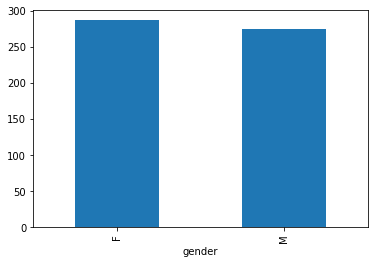

In [66]:
category_wise_size = merged_data.groupby(["category"],as_index=False)[['subject_id']].count().sort_values(by=['subject_id'],ascending=False)
category_with_max_requests = category_wise_size.iloc[0,0]
gender_vise_data = merged_data[(merged_data.category == category_with_max_requests)].groupby('gender')['subject_id'].count()
gender_vise_data.plot(kind='bar')

---
---
#Requesting access to MIMIC-III
---

---


> During the first exercise session, all students (from both BME and MACs program) will need to complete the CITI “Data or Specimens Only Research” course which will can take 2.5 hours approximately. All the knowledge you will learn while completing the report will help you to understand better the importance of ethics, privacy, confidentiality etc in health information systems. Each group, must  insert in the cell below a screenshot of your CITI completion report (each student should do this individually and independently, screenshots from both students should be attached below). Students enrolled in BME master program, in addition will need to request access to MIMIC-III dataset developed by the MIT Lab.  This database includes clinical notes, demographics, vital signs, laboratory tests and more which you will be using during some of the lab sessions or/and in your project. The dataset can not be downloaded directly, but one needs to submit a request first — which is usually approved within a couple of days. All the required information on how to request access can be found [here](https://mimic.physionet.org/gettingstarted/access/). Detailed information about each step to follow can be found in this [link](https://towardsdatascience.com/getting-access-to-mimic-iii-hospital-database-for-data-science-projects-791813feb735). You will need to attach the CITI completion report during your request submission. After succesfully submitting your request, you should recieve an email with subject "PhysioNet credentialing application notification" from PhysioNet confirming that you have succesfuly submitted your request. In addition to the CITI completion report, you must insert in the cell below a screenshot of this confirmation email to show that you already submitted the request to get access to the database (both students should submit!). 

---

In [25]:
from IPython.display import Image
img1 = 'img1.png'
Image(url=img1, width=400, height=400,)

In [26]:
img2 = 'img2.png'
Image(url=img2, width=400, height=400,)